# plotnine-Beispiele

## Einfaches Streudiagramm

### 1. Importe

In [1]:
from plotnine import *
from plotnine.data import mtcars

### 2. Streudiagramm

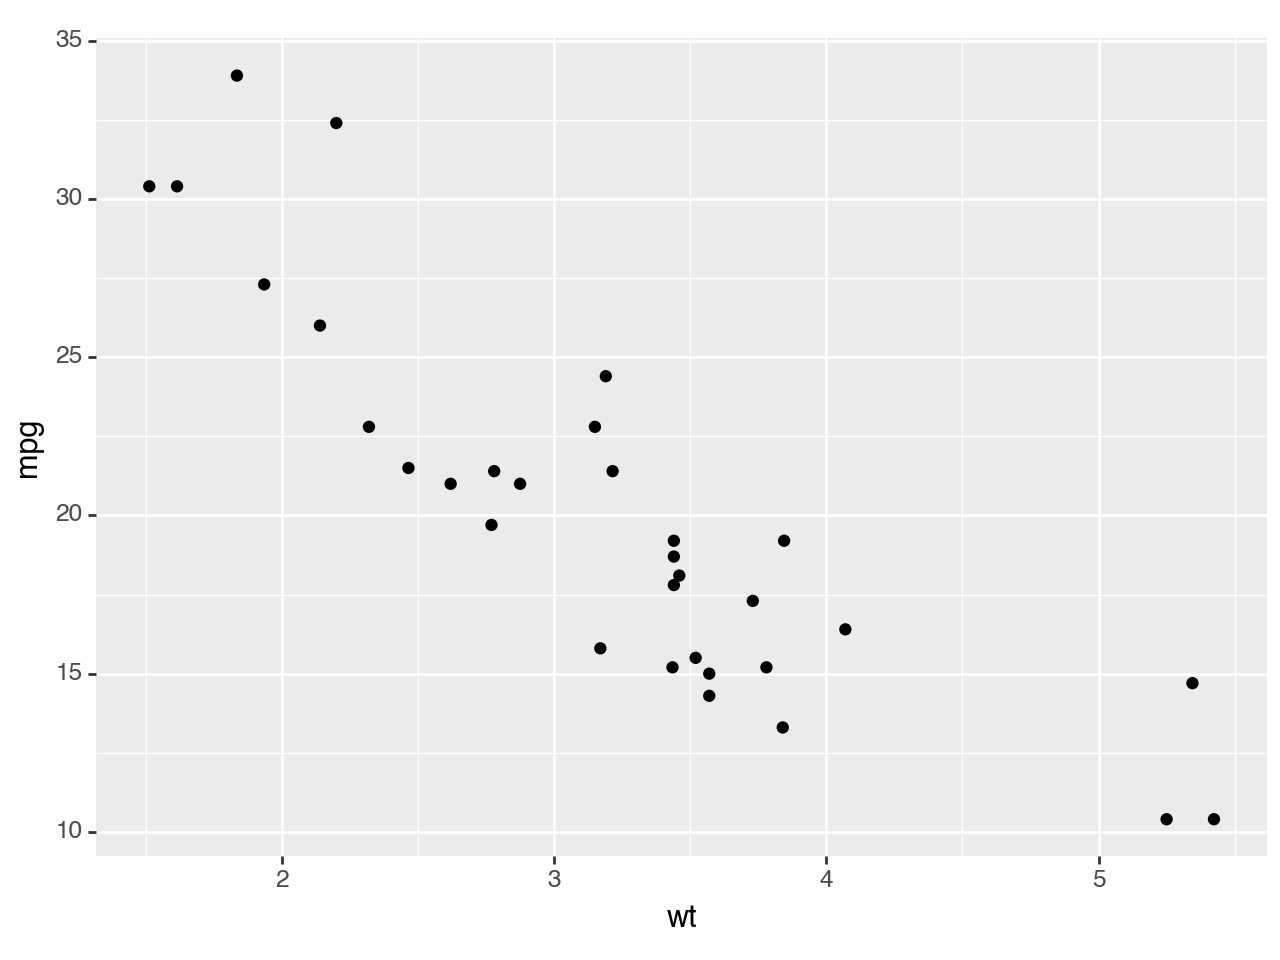

<Figure Size: (640 x 480)>

In [2]:
(
    ggplot(mtcars, aes("wt", "mpg"))
    + geom_point()
)

[plotnine.mapping.aes](https://plotnine.readthedocs.io/en/stable/generated/plotnine.mapping.aes.html) erstellt ästhetische Zuordnungen mit der *Meilen je Gallone* `mpg` auf der y-Achse und *Gewicht der Autos* `wt` auf der x-Achse. [plotnine.geoms.geom_point](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html) erstellt dann ein Streudiagramm.

### 3. Farbliche Unterscheidung der Variablen

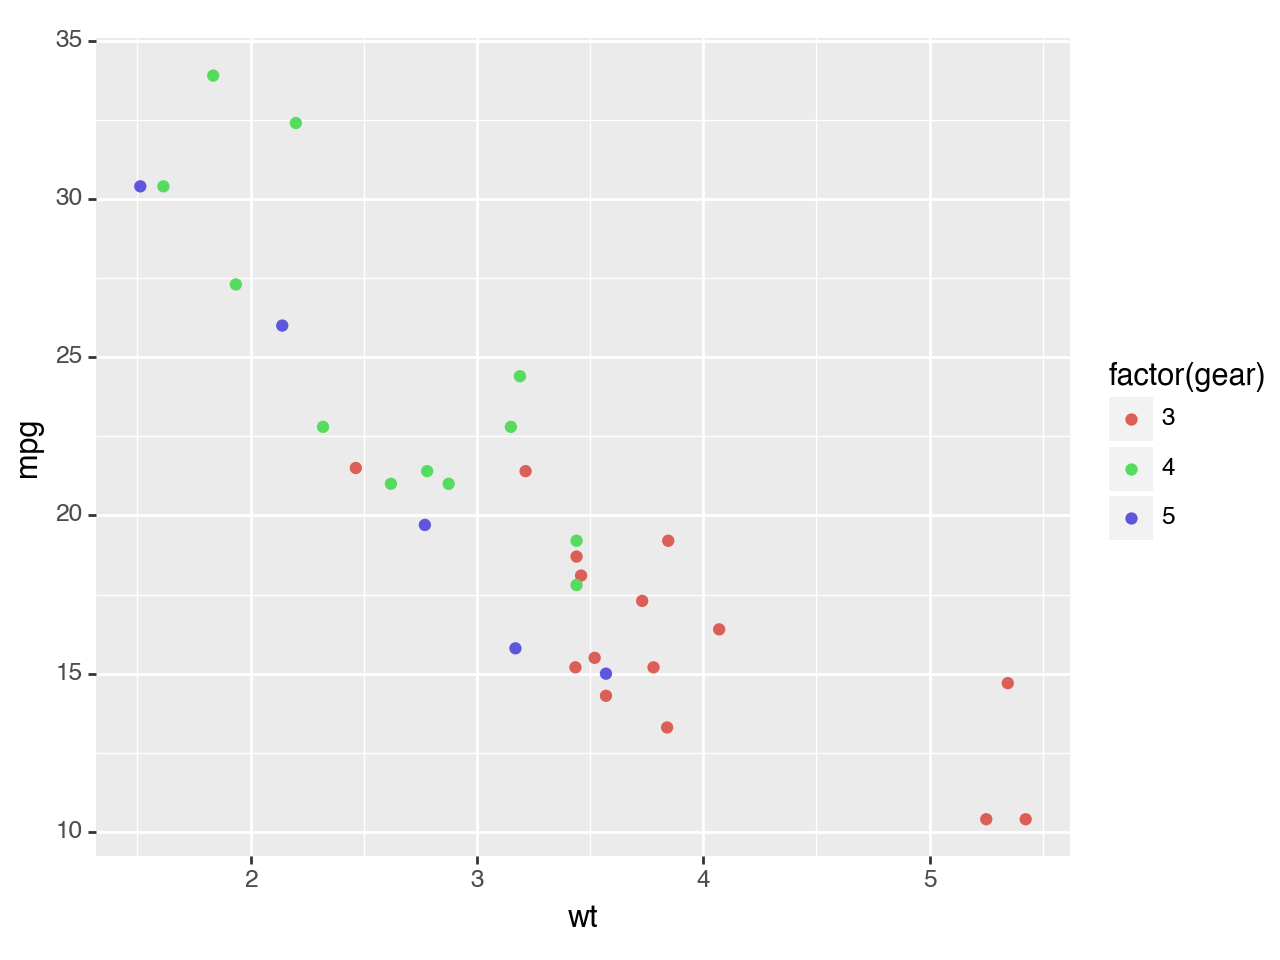

<Figure Size: (640 x 480)>

In [3]:
(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
)

### 4. Geglättetes lineares Modell mit Konfidenzintervallen

Mit [plotnine.stats.stat_smooth](https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_smooth.html?highlight=stat_smooth) lassen sich geglättete  bedingte Mittwlwerte berechnen, wobei `lm` ein lineares Modell zugrundelegt: 

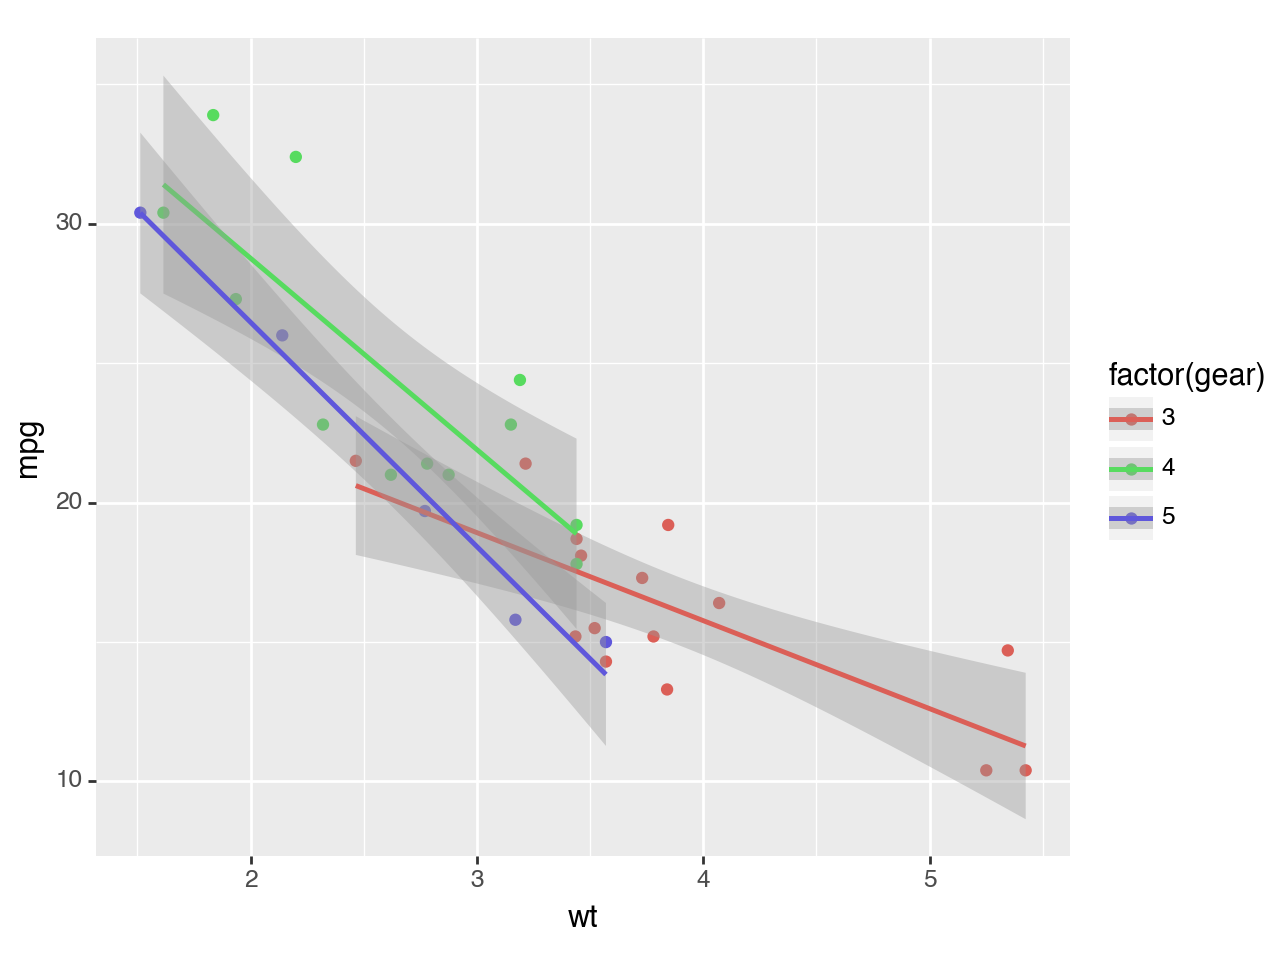

<Figure Size: (640 x 480)>

In [4]:
(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
)

### 5. Darstellung in separierten Feldern

Mit [plotnine.facets.facet_wrap](https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_wrap.html) lassen sich die Felder trennen.

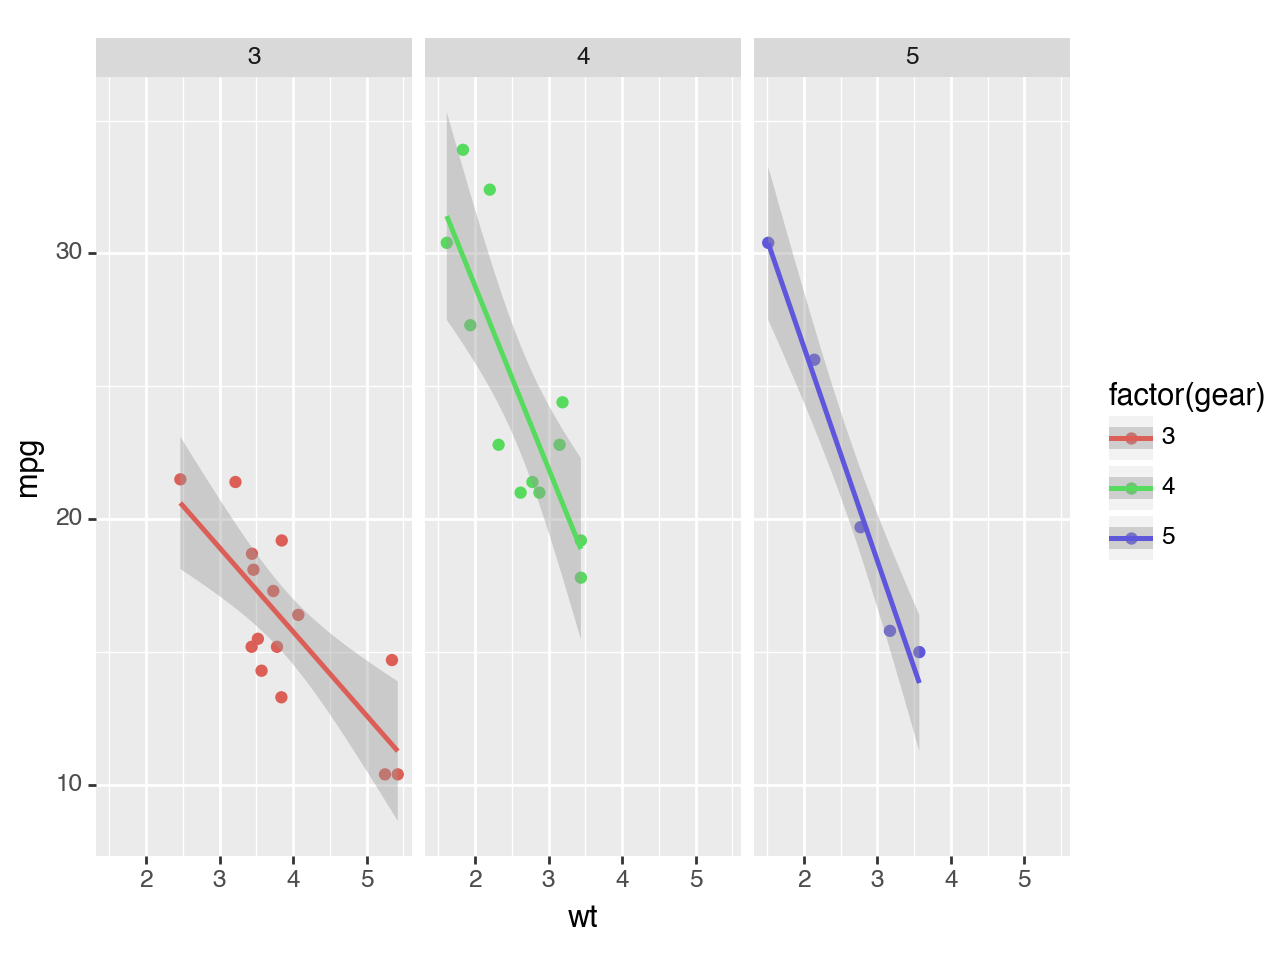

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("~gear")
)

## Interaktive Diagramme

Zusammen mit [ipywidgets](https://jupyter-tutorial.readthedocs.io/de/latest/workspace/jupyter/ipywidgets/index.html) lassen sich auch interaktive Diagramme erstellen.

### 1. Importe

In [6]:
import itertools

from copy import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

from IPython.display import display
from ipywidgets import widgets
from plotnine.data import mtcars

### 2. Interaktives Streudiagramm erstellen

Im folgenden betrachten wir PS auf der x-Achse, Meilen je Gallone auf der y-Achse und unterscheiden farblich das Gewicht der Autos:

<IPython.core.display.Javascript object>


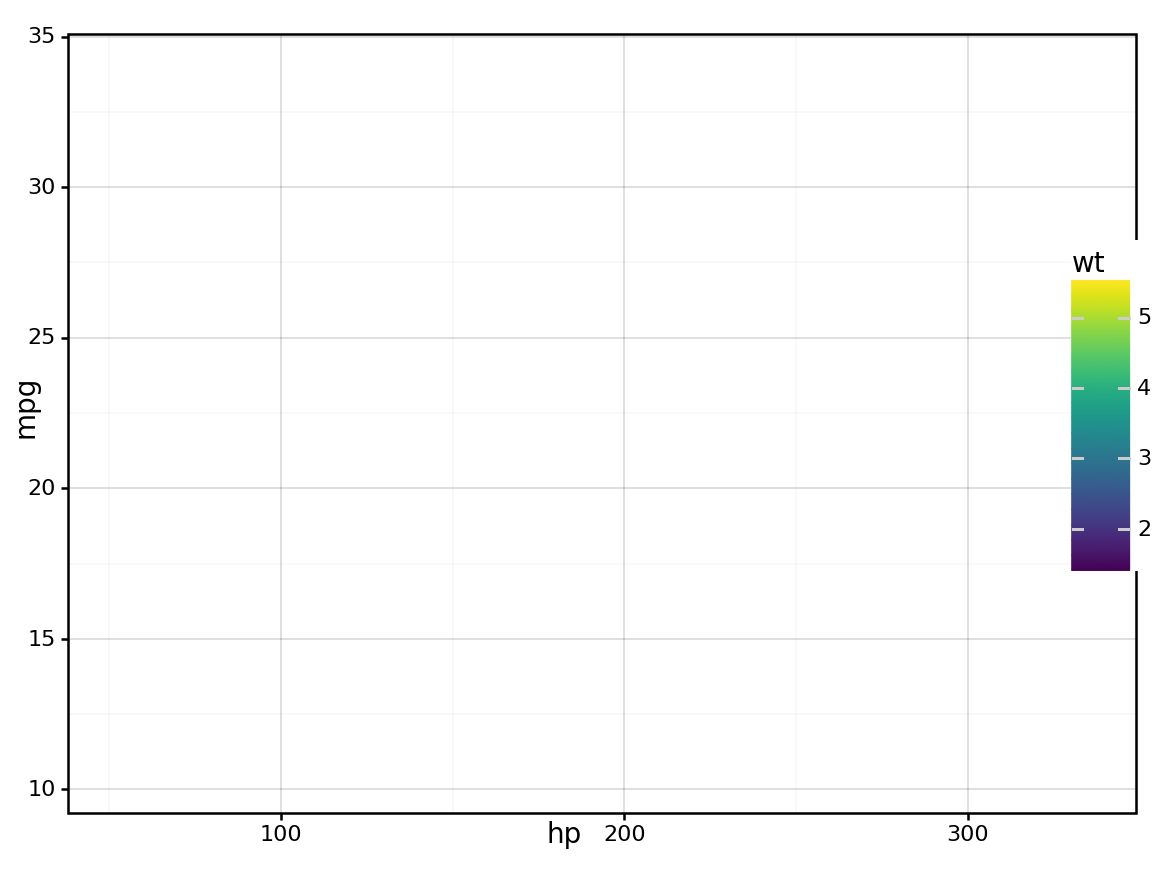

<Figure Size: (640 x 480)>

In [7]:
%matplotlib notebook

p = (ggplot(mtcars, aes(x="hp", y="mpg", color="wt"))
     + p9.geom_point()
     + p9.theme_linedraw()
    )
p

### 3. Nun wählen wir die Autos anhand der Zylinderanzahl aus:

Dropdown(description='Cylinders:', index=1, options=(4, 6, 8), value=6)

<IPython.core.display.Javascript object>


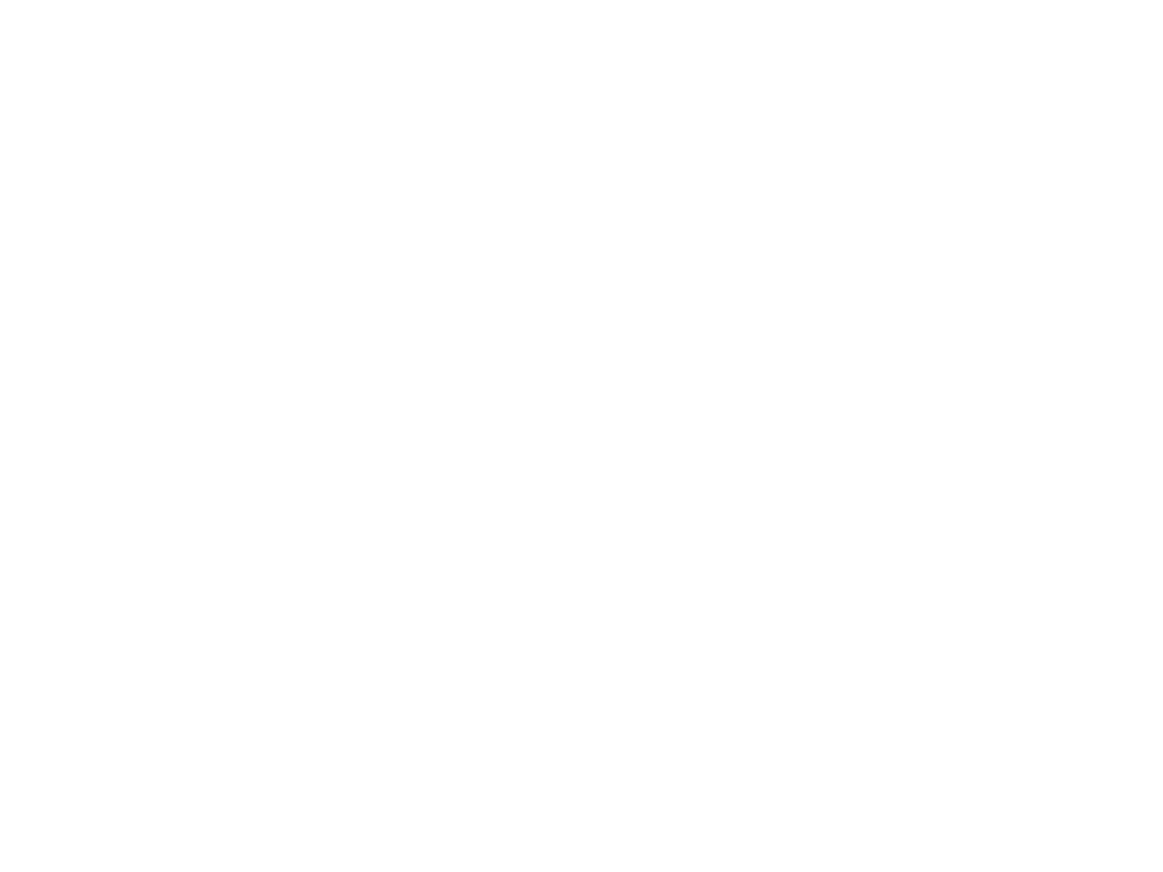

/var/folders/hk/s8m0bblj0g10hw885gld52mc0000gn/T/ipykernel_78706/2476450268.py:73: UserWarning: The figure layout has changed to tight


In [8]:
# Prepre the list we will use to selec sub-sets of data based on number of cylinders.
cylList = np.unique(mtcars["cyl"])

# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


def get_current_artists():
    # Return artists attached to all the matplotlib axes
    axes = plt.gca()
    return itertools.chain(
        axes.lines, axes.collections, axes.artists, axes.patches, axes.texts
    )


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widget
    cylValue = cylSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[(mtcars["cyl"] == cylValue), :]

    # Create plotnine's plot

    # Using the maximum and minimum values we gatehred before, we can keep the plot axis from
    # changing with the cyinder selection
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
    )
    if fig is None:
        # If this is the first time a plot is made in the notebook, we let plotnine create a new
        # matplotlib figure and axis.
        fig = p.draw()
        axs = fig.axes
    else:
        # p = copy(p)
        # This helps keeping old selected data from being visualized after a new selection is made.
        # We delete all previously reated artists from the matplotlib axis.
        for artist in get_current_artists():
            artist.remove()

        # If a plot is being updated, we re-use the figure an axis created before.
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")

# Display the widgets
display(cylSelect)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

### 4. Drop-Down-Menü hinzufügen

Nun erstellen wir ein Drop-Down-Menü zur Auswahl der Zylinder

Dropdown(description='Cylinders:', index=1, options=(4, 6, 8), value=6)

<IPython.core.display.Javascript object>


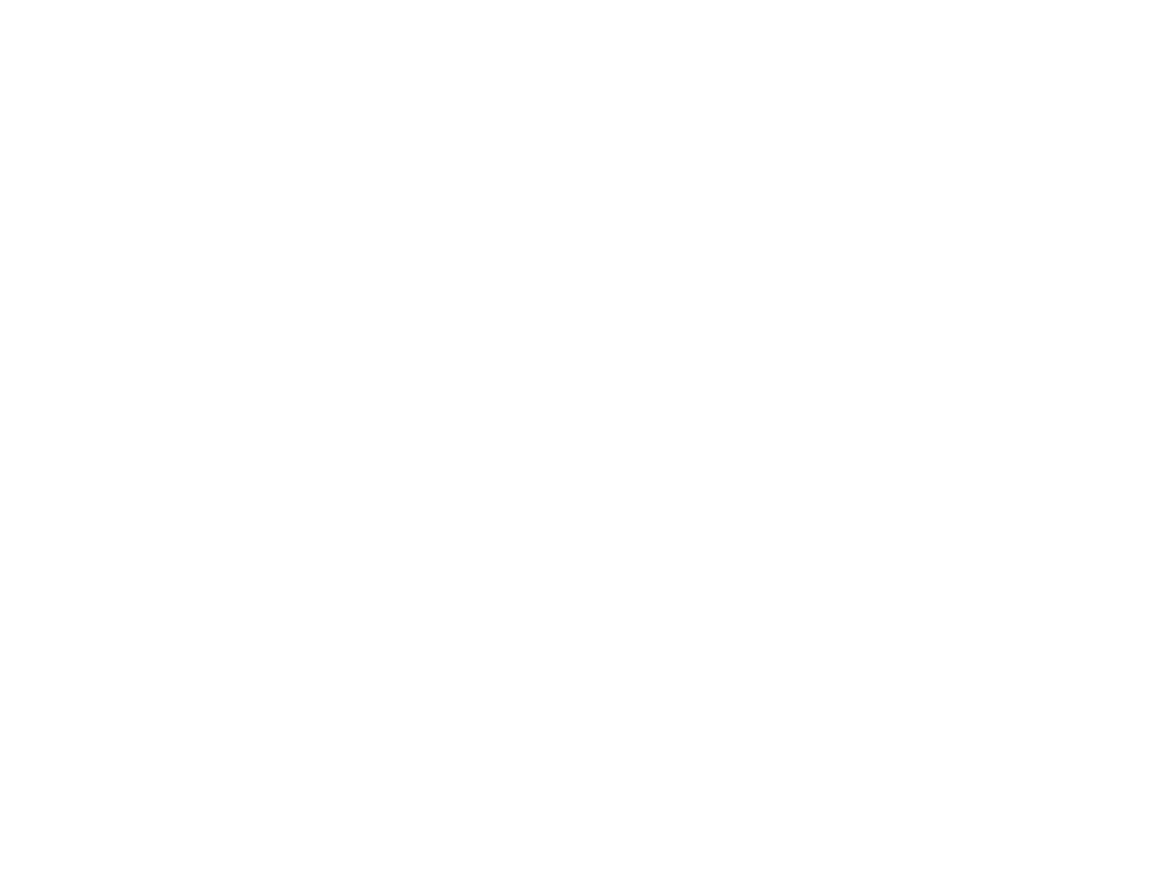

In [9]:
# We now get the maximum ranges of relevant variables to keep axis constant between images.

# Get range of weight
minWt = min(mtcars["wt"])
maxWt = max(mtcars["wt"])
# We get all unique values of weigh, sort them, and transform the numpy.array into a python list.
wtOptions = list(
    np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylList[0], "wt"]))
)

minHP = min(mtcars["hp"])
maxHP = max(mtcars["hp"])

minMPG = min(mtcars["mpg"])
maxMPG = max(mtcars["mpg"])

# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widget
    cylValue = cylSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[(mtcars["cyl"] == cylValue), :]

    # Create plotnine's plot

    # Using the maximum and minimum values we gatehred before, we can keep the plot axis from
    # changing with the cyinder selection
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
        + p9.lims(x=[minHP, maxHP], y=[minMPG, maxMPG])
        + p9.scale_color_continuous(limits=(minWt, maxWt))
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        # p = copy(p)
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")

# Display the widgets
display(cylSelect)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

### 5. Bereichsregler hinzufügen

Nun schränken wir mit einem Bereichsregler die Daten basierend auf dem Fahrzeuggewicht ein:

<IPython.core.display.Javascript object>


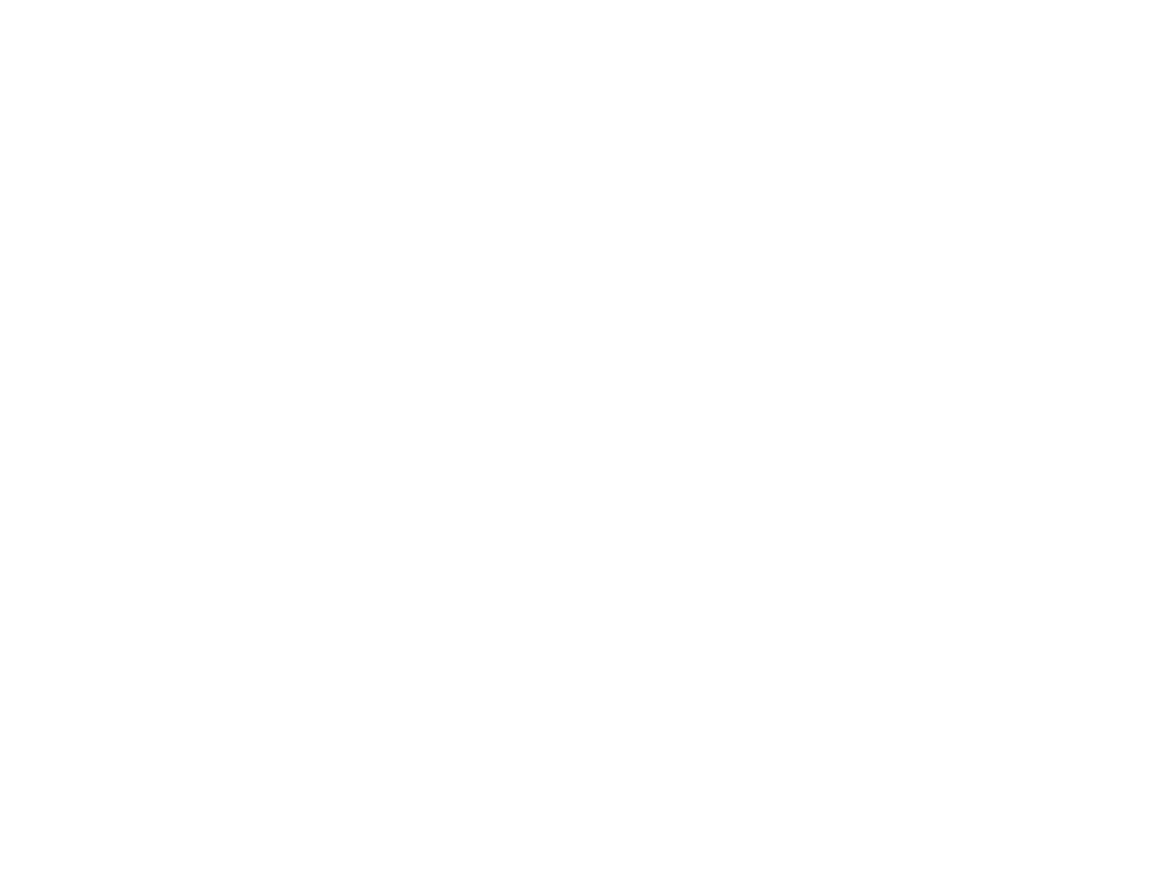

In [10]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# The second selection is a range of weights
wtSelect = widgets.SelectionRangeSlider(
    options=wtOptions,
    index=(0, len(wtOptions) - 1),
    description="Weight",
    disabled=False,
)

widgetsCtl = widgets.HBox([cylSelect, wtSelect])


# The range of weights needs to always be dependent on the cylinder selection.
def updateRange(*args):
    """Updates the selection range from the slider depending on the cylinder selection."""
    cylValue = cylSelect.value

    wtOptions = list(
        np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylValue, "wt"]))
    )

    wtSelect.options = wtOptions
    wtSelect.index = (0, len(wtOptions) - 1)


cylSelect.observe(updateRange, "value")

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widgets
    cylValue = cylSelect.value
    wrRange = wtSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[
        (mtcars["cyl"] == cylValue)
        & (mtcars["wt"] >= wrRange[0])
        & (mtcars["wt"] <= wrRange[1]),
        :,
    ]

    # Create plotnine's plot

    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
        + p9.lims(x=[minHP, maxHP], y=[minMPG, maxMPG])
        + p9.scale_color_continuous(limits=(minWt, maxWt))
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")
wtSelect.observe(plotUpdate, "value")

# Display the widgets
display(widgetsCtl)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

### 6. Diagramm optimieren

Schließlich ändern wir noch einige Diagrammeigenschaften, um eine verständlichere Abbildung zu erhalten:

<IPython.core.display.Javascript object>


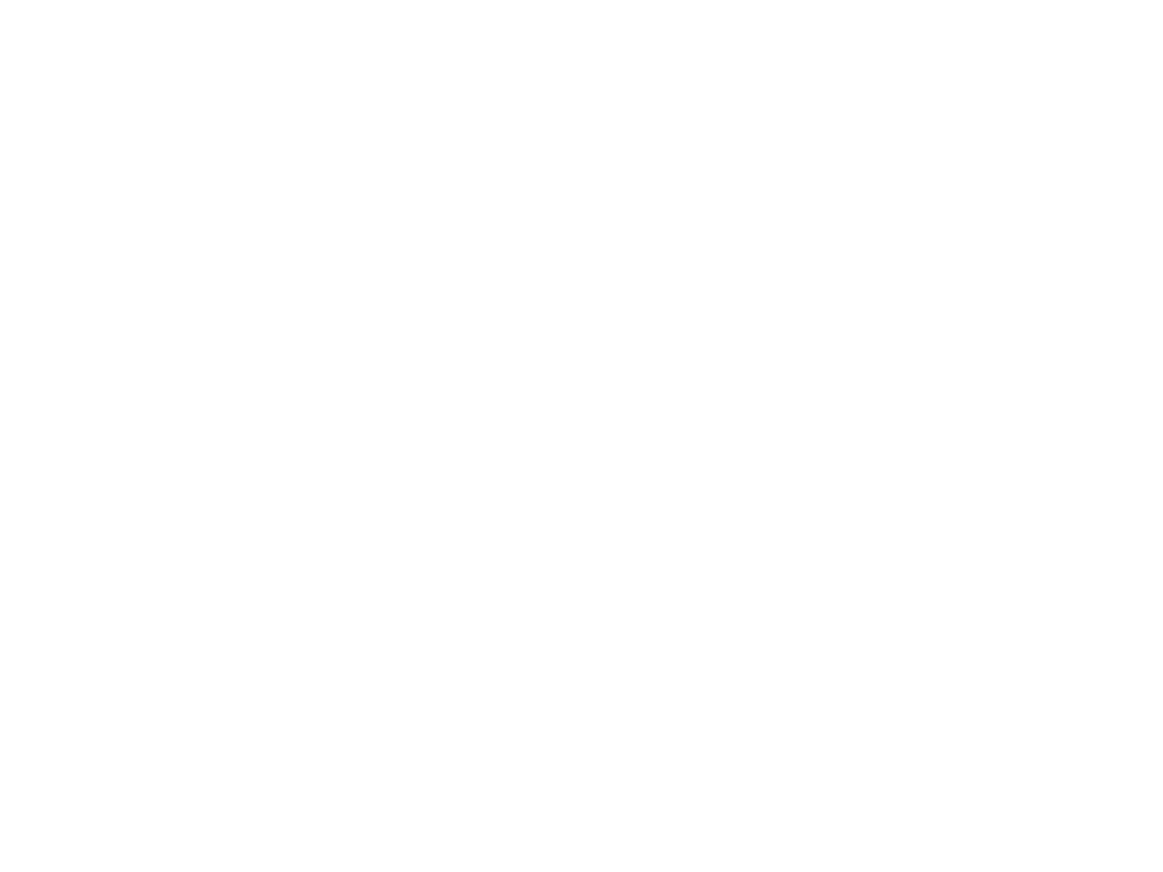

In [11]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# The second selection is a range of weights
wtSelect = widgets.SelectionRangeSlider(
    options=wtOptions,
    index=(0, len(wtOptions) - 1),
    description="Weight",
    disabled=False,
)

widgetsCtl = widgets.HBox([cylSelect, wtSelect])


# The range of weights needs to always be dependent on the cylinder selection.
def updateRange(*args):
    """Updates the selection range from the slider depending on the cylinder selection."""
    cylValue = cylSelect.value

    wtOptions = list(
        np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylValue, "wt"]))
    )

    wtSelect.options = wtOptions
    wtSelect.index = (0, len(wtOptions) - 1)


cylSelect.observe(updateRange, "value")

fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widgets
    cylValue = cylSelect.value
    wrRange = wtSelect.value

    # Create a temporary dataset that is constrained by the user's selections of
    # number of cylinders and weight.
    tmpDat = mtcars.loc[
        (mtcars["cyl"] == cylValue)
        & (mtcars["wt"] >= wrRange[0])
        & (mtcars["wt"] <= wrRange[1]),
        :,
    ]

    # Create plotnine's plot showing all data ins smaller grey points, and
    # the selected data with coloured points.
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point(mtcars, color="grey")
        + p9.geom_point(size=3)
        + p9.theme_linedraw()
        + p9.xlim([minHP, maxHP])
        + p9.ylim([minMPG, maxMPG])
        + p9.scale_color_continuous(
            name="spring", limits=(np.floor(minWt), np.ceil(maxWt))
        )
        + p9.labs(x="Horse-Power", y="Miles Per Gallon", color="Weight")
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")
wtSelect.observe(plotUpdate, "value")

# Display the widgets
display(widgetsCtl)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]